# Impact of Coronavirus on Air Quality
#### Visualised and analysed by Jack Wang (https://github.com/ZhaohanJackWang)


The project aims to find the relationship between coronavirus cases and air quality. The hypothesis is: air pollution will decrease as coronavirus cases increase.

### Related datasets:

- "NSW COVID-19 cases by location and likely source of infection" provided by NSW Ministry of Health (https://data.nsw.gov.au/data/dataset/nsw-covid-19-cases-by-location-and-likely-source-of-infection)
- "AQI at monitoring stations in NSW" provided by Department of Planning, Industry and Environment (https://www.dpie.nsw.gov.au/air-quality/air-quality-data-services/data-download-facility)

## The Analysis on Coronavirus

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import seaborn as sns
import warnings

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()

In [2]:
if os.path.isfile("covid-19-cases-by-notification-date-location-and-likely-source-of-infection.csv"):
    filepath = "covid-19-cases-by-notification-date-location-and-likely-source-of-infection.csv"
else:
    filepath = "https://www.kaggle.com/ryanskene/see19-a-comprehensive-global-covid19-dataset"

covid = pd.read_csv(filepath)
print("done")

done


In [3]:
covid_data = pd.read_csv('covid-19-cases-by-notification-date-location-and-likely-source-of-infection.csv',parse_dates=True,index_col='Date',dayfirst=True)

import re

def cleansuburb(suburb):
    try:
        return re.sub( " \(\w\)", "", suburb)
    except:
        pass
covid_data['suburb_name'] = covid_data.Suburb.apply(cleansuburb)
covid_data['suburb_name'] = covid_data['suburb_name'].str.upper() 
covid_data.head(5)

,postcode,likely source of infection,lhd_2010_code,Location,lga_code19,Suburb,suburb_name
Date,,,,,,,
2020-01-25,2134.0,Overseas,X700,Sydney,11300.0,Burwood (A),BURWOOD
2020-01-25,2121.0,Overseas,X760,Northern Sydney,16260.0,Parramatta (C),PARRAMATTA
2020-01-25,2071.0,Overseas,X760,Northern Sydney,14500.0,Ku-ring-gai (A),KU-RING-GAI
2020-01-27,2033.0,Overseas,X720,South Eastern Sydney,16550.0,Randwick (C),RANDWICK
2020-03-01,2163.0,Overseas,X710,South Western Sydney,12850.0,Fairfield (C),FAIRFIELD


In [4]:
covid_date = covid['Date'].value_counts().sort_index()
def new_cases():
    covid_date.plot(kind = 'bar')
    pal = sns.color_palette("viridis", len(covid_date))
    rank = covid_date.argsort().argsort()
    ax = sns.barplot(x=covid_date.index, y=covid_date, palette=np.array(pal[::-1])[rank])
    ax.set_xticklabels(covid_date.iloc[::int(12)].index, rotation=0)
    xtix = ax.get_xticks()
    ax.set_xticks(xtix[::int(12)]);
    
    plt.title("Covid-19 New Cases from {} to {}".format("1st of Jan 2020", "13th of July 2020"), fontsize=20)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('New Cases', fontsize=15)
    plt.grid(True)
    return (plt.show())

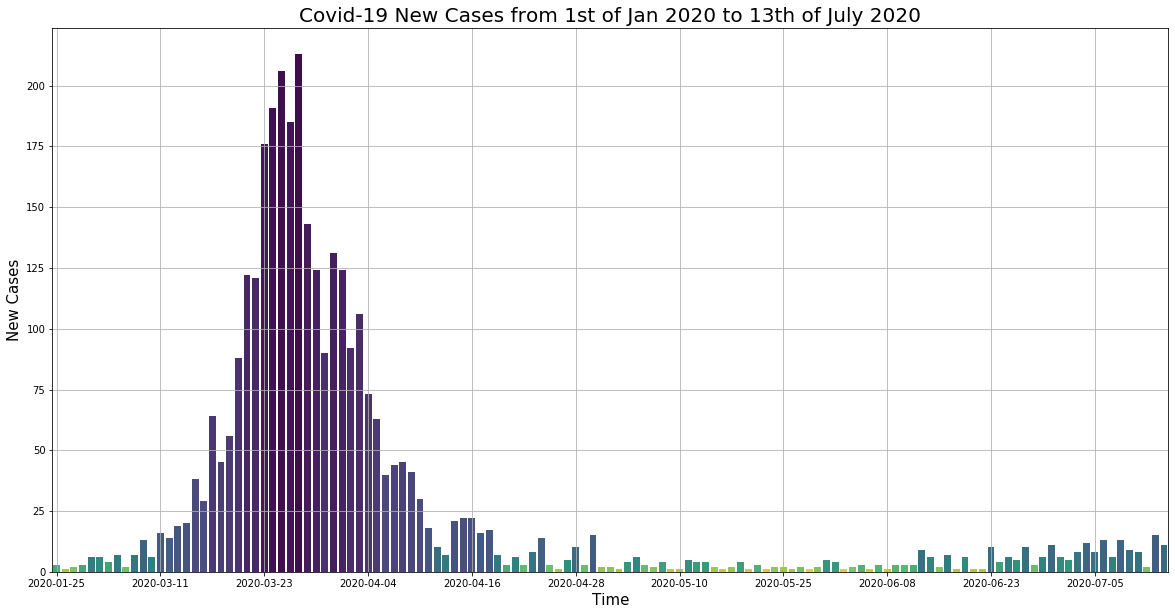

In [5]:
new_cases()

In [6]:
def cum_cases():
    covid_cum = covid_date.cumsum()
    covid_cum.plot(kind = 'bar')
    pal = sns.color_palette("viridis", len(covid_cum))
    rank = covid_cum.argsort().argsort()
    ax = sns.barplot(x=covid_cum.index, y=covid_cum, palette=np.array(pal[::-1])[rank])
    ax.set_xticklabels(covid_cum.iloc[::int(12)].index, rotation=0)
    xtix = ax.get_xticks()
    ax.set_xticks(xtix[::int(12)]);
    
    plt.title("Covid-19 Cumulated Number of Cases from {} to {}".format("1st of Jan 2020", "13th of July 2020"), fontsize=20)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Total Cases', fontsize=15)
    plt.grid(True)
    return (plt.show())

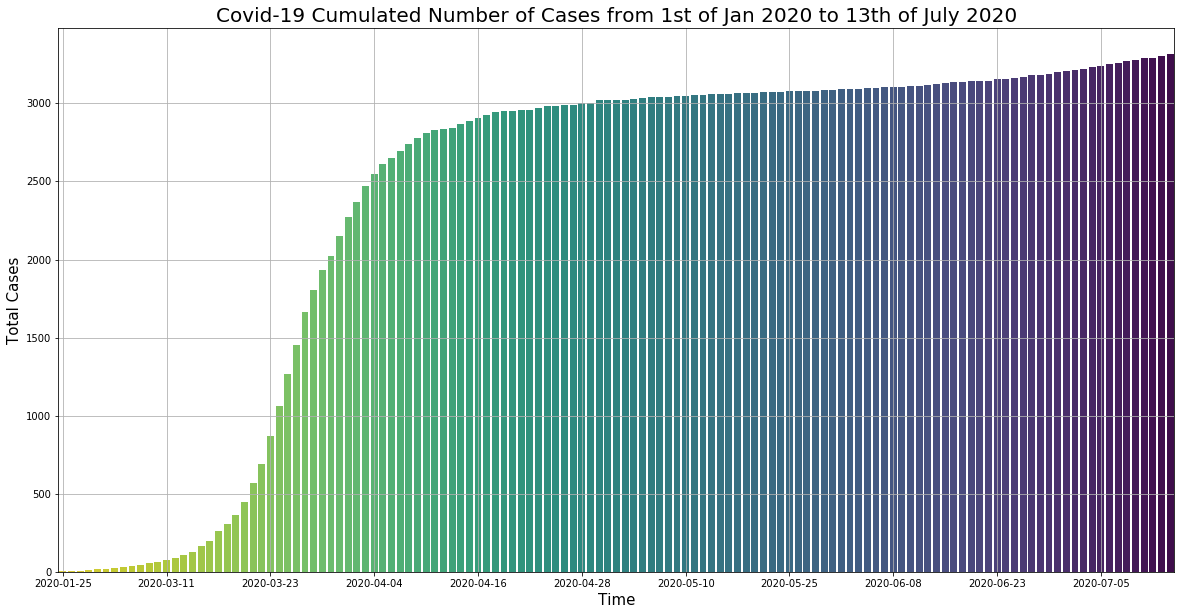

In [7]:
cum_cases()

In [8]:
def cases_loc():
    covid_loc = covid['Location'].value_counts()
    pal = sns.cubehelix_palette(8, start=.5, rot=-.75, reverse=True, as_cmap=True)
    covid_loc.plot(kind='pie', figsize=(12,12), cmap = pal, pctdistance=1, wedgeprops   = { 'linewidth' : 1,'edgecolor' : "white" },label='')
    plt.title("Number of Confirmed Cases in Regions of NSW", fontsize=20);
    return (plt.show())

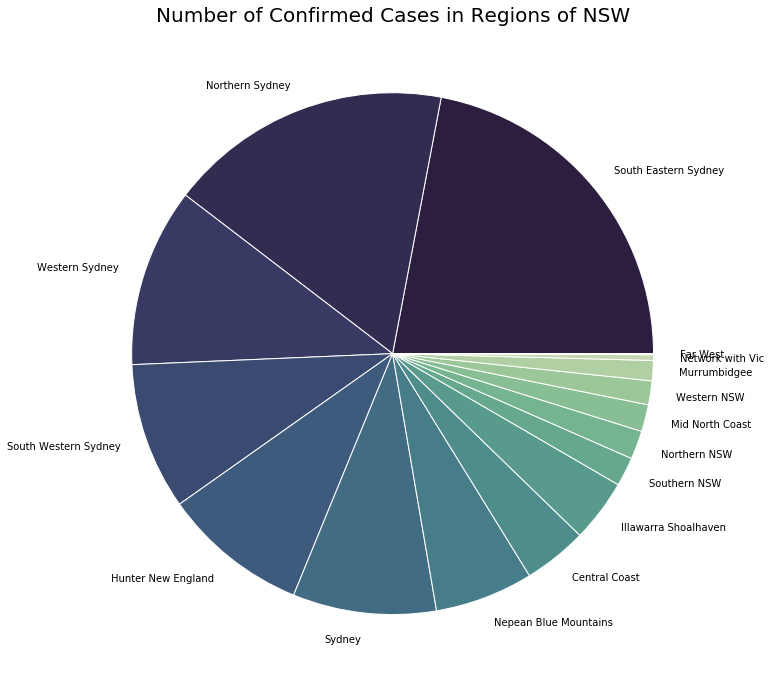

In [9]:
cases_loc()

In [10]:
if os.path.isfile("australian_postcodes.csv"):
    filepath = "australian_postcodes.csv"
else:
    filepath = "https://www.matthewproctor.com/australian_postcodes"

postcodes = pd.read_csv(filepath)
print("done")

done


In [11]:
postcodes.head(5)

,id,postcode,nsw_loca_2,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name,region
0,230,200,ANU,ACT,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R1
1,21820,200,Australian National University,ACT,149.118900,-35.277700,NaN,NaN,Added 19-Jan-2020,NaN,NaN,NaN,NaN,R1
2,232,800,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 6-Feb-2020,70101.0,Darwin City,701.0,Darwin,R1
3,233,801,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 25-Mar-2020 SA3,70101.0,Darwin City,701.0,Darwin,R1
4,234,804,PARAP,NT,130.873315,-12.428017,NaN,NaN,Updated 25-Mar-2020 SA3,70102.0,Darwin Suburbs,701.0,Darwin,R1


In [12]:
nsw = gpd.read_file("nswmap.json")
nsw_loss = nsw.drop(['dt_create','dt_retire','nsw_locali','nsw_loca_1','nsw_loca_3','nsw_loca_4','nsw_loca_5','nsw_loca_6','nsw_loca_7'], axis=1)

In [13]:
left_join_df= pd.merge(nsw_loss, postcodes, on='nsw_loca_2', how='left')

In [14]:
covid_burb1 = covid_data['postcode'].value_counts().reset_index()
covid_burb1.columns = ['postcode', 'counts']

In [15]:
covid_map = pd.merge(left_join_df, covid_burb1, on='postcode', how='left')
covid_map.head(5)

,id_x,lc_ply_pid,loc_pid,nsw_loca_2,geometry,id_y,postcode,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name,region,counts
0,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.1,25113,NSW1147,CROYDON PARK,"POLYGON ((151.11700 -33.89152, 151.11662 -33.8...",4261.0,2133.0,NSW,151.102087,-33.898793,CROYDON PARK DC,Delivery Area,Updated 6-Feb-2020,12003.0,Strathfield - Burwood - Ashfield,120.0,Sydney - Inner West,R1,NaN
1,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.1,25113,NSW1147,CROYDON PARK,"POLYGON ((151.11700 -33.89152, 151.11662 -33.8...",13704.0,5008.0,SA,138.559407,-34.887511,REGENCY PARK DC,Delivery Area,Updated 6-Feb-2020,40402.0,Port Adelaide - West,404.0,Adelaide - West,R2,NaN
2,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.2,25065,NSW2557,MAYFIELD WEST,"POLYGON ((151.73345 -32.87974, 151.73282 -32.8...",3430.0,2304.0,NSW,151.738620,-32.880319,HAMILTON DC,Delivery Area,Updated 6-Feb-2020,11103.0,Newcastle,111.0,Newcastle and Lake Macquarie,R2,3.0
3,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.3,25115,NSW797,CAMPSIE,"POLYGON ((151.11002 -33.90297, 151.11168 -33.9...",2885.0,2194.0,NSW,151.101777,-33.917601,CROYDON PARK DC,Delivery Area,Updated 6-Feb-2020,12003.0,Strathfield - Burwood - Ashfield,120.0,Sydney - Inner West,R1,5.0
4,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.4,16193,NSW4136,WALLACETOWN,"POLYGON ((147.48238 -34.96891, 147.50777 -34.9...",3843.0,2650.0,NSW,147.376202,-35.074590,WAGGA WAGGA DC,Delivery Area,Updated 6-Feb-2020,11303.0,Wagga Wagga,113.0,Riverina,R3,10.0


In [16]:
def cases_regions():
    fig, ax = plt.subplots(0)
    ax = nsw.plot(linewidth=0.2, facecolor='w', edgecolor='0.6')
    ax = covid_map.plot(ax=ax, column='counts', linewidth=0.2, cmap='mako_r', edgecolor='0.7')
    plt.title("Coronavirus Cases in Different Regions", fontsize=20)

    ax.figure.colorbar(ax.collections[1], label='Number of Cases')
    return (plt.show())

<Figure size 1440x720 with 0 Axes>

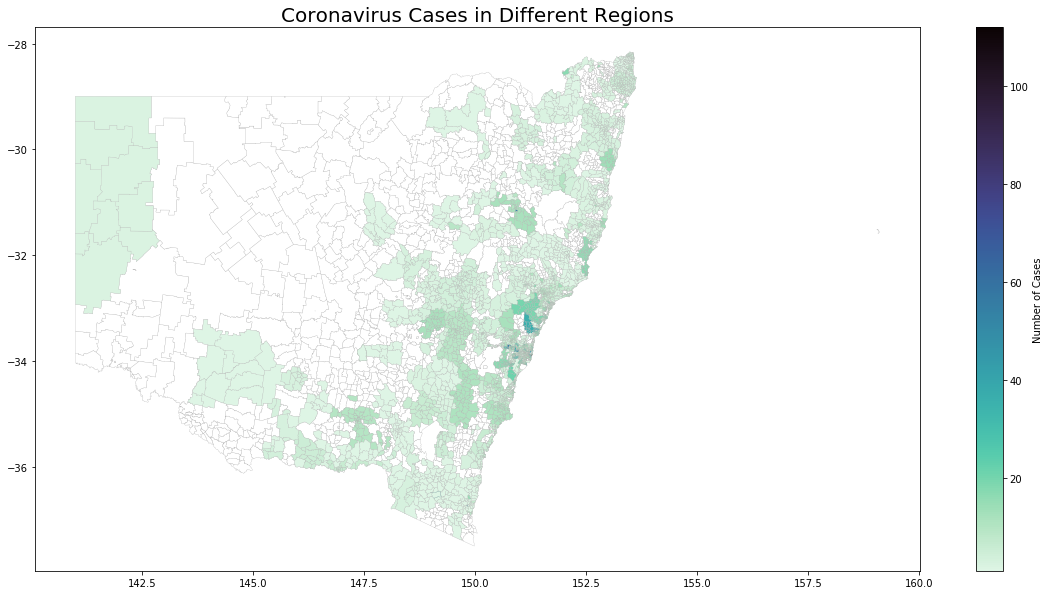

In [17]:
cases_regions()

In [18]:
if os.path.isfile("tmp_table_11675_1596713571.xls"):
    filepath = "tmp_table_11675_1596713571.xls"
else:
    filepath = "https://www.dpie.nsw.gov.au/air-quality/air-quality-data-services/data-download-facility"

air_data = pd.read_excel(filepath)
print("done")

done


In [19]:
def normalised_regions():
    covid_map['normalised_counts'] = covid_map['counts']**(1/2) #normalise the data
    fig, ax = plt.subplots(0)
    ax = nsw.plot(linewidth=0.2, facecolor='w', edgecolor='0.6')
    ax = covid_map.plot(ax=ax, column='normalised_counts', linewidth=0.2, cmap='mako_r', edgecolor='0.7')
    plt.title("Normalised Coronavirus Cases in Different Regions", fontsize=20)

    ax.figure.colorbar(ax.collections[1], label='Number of Normalised Cases')
    return (plt.show())

<Figure size 1440x720 with 0 Axes>

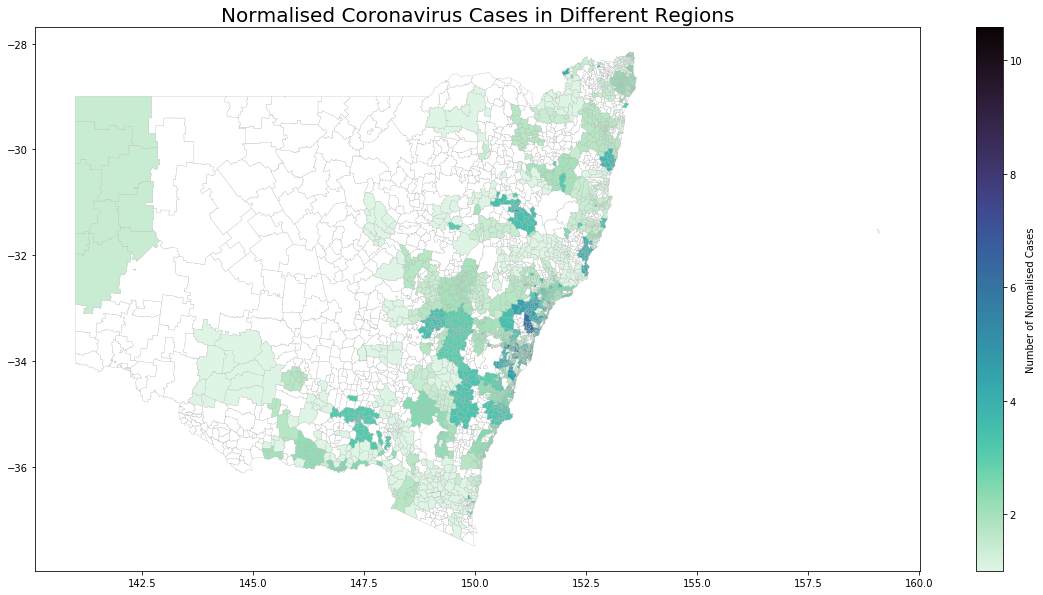

In [20]:
normalised_regions()

## The Analysis on Air Quality

In [21]:
air_datecorrected = pd.read_excel('tmp_table_11675_1596713571.xls',parse_dates=True,index_col='Date',dayfirst=True)
air_datecorrected.head(5)

,RANDWICK AQI 24 hour [index],ROZELLE AQI 24 hour [index],LINDFIELD AQI 24 hour [index],LIVERPOOL AQI 24 hour [index],BRINGELLY AQI 24 hour [index],CHULLORA AQI 24 hour [index],EARLWOOD AQI 24 hour [index],WYONG AQI 24 hour [index],WALLSEND AQI 24 hour [index],CARRINGTON AQI 24 hour [index],...,GUNNEDAH AQI 24 hour [index],ARMIDALE AQI 24 hour [index],ORANGE AQI 24 hour [index],PORT MACQUARIE AQI 24 hour [index],KATOOMBA AQI 24 hour [index],ROUSE HILL AQI 24 hour [index],SYDNEY AQI 24 hour [index],GOULBURN AQI 24 hour [index],COFFS HARBOUR AQI 24 hour [index],LISMORE AQI 24 hour [index]
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,74,70.0,72.0,90.0,95.0,80,77.0,85.0,91.0,57,...,71.0,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,55,55.0,59.0,76.0,95.0,63,54.0,57.0,158.0,112,...,73.0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,51,45.0,46.0,47.0,59.0,53,45.0,44.0,55.0,85,...,69.0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,50,48.0,59.0,85.0,106.0,57,52.0,47.0,51.0,97,...,58.0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,85,67.0,62.0,78.0,70.0,69,64.0,59.0,80.0,116,...,53.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
air_transpose = air_datecorrected.T
def cleanaqi(aqi):
    try:
        return re.sub(" AQI 24 hour \[index\]\.*\d*", "", aqi)
    except:
        pass
air_transpose['x_suburb'] = air_transpose.index
air_transpose['nsw_loca_2'] = air_transpose.x_suburb.apply(cleanaqi)
air_transpose.set_index('nsw_loca_2')
air_transpose.head(5)

Date,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,...,2020-07-06 00:00:00,2020-07-07 00:00:00,2020-07-08 00:00:00,2020-07-09 00:00:00,2020-07-10 00:00:00,2020-07-11 00:00:00,2020-07-12 00:00:00,2020-07-13 00:00:00,x_suburb,nsw_loca_2
RANDWICK AQI 24 hour [index],74.0,55.0,51.0,50.0,85.0,34.0,36.0,45.0,50.0,25.0,...,37.0,32.0,29.0,33.0,74.0,50.0,74.0,37.0,RANDWICK AQI 24 hour [index],RANDWICK
ROZELLE AQI 24 hour [index],70.0,55.0,45.0,48.0,67.0,30.0,31.0,41.0,49.0,25.0,...,30.0,27.0,26.0,48.0,91.0,49.0,66.0,31.0,ROZELLE AQI 24 hour [index],ROZELLE
LINDFIELD AQI 24 hour [index],72.0,59.0,46.0,59.0,62.0,30.0,32.0,45.0,52.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINDFIELD AQI 24 hour [index],LINDFIELD
LIVERPOOL AQI 24 hour [index],90.0,76.0,47.0,85.0,78.0,42.0,36.0,69.0,51.0,35.0,...,37.0,29.0,40.0,66.0,72.0,105.0,79.0,38.0,LIVERPOOL AQI 24 hour [index],LIVERPOOL
BRINGELLY AQI 24 hour [index],95.0,95.0,59.0,106.0,70.0,30.0,30.0,61.0,57.0,23.0,...,74.0,31.0,35.0,38.0,45.0,72.0,43.0,35.0,BRINGELLY AQI 24 hour [index],BRINGELLY


In [23]:
average_air = pd.DataFrame(air_datecorrected.mean(axis = 1))

def air_mask():
    upper = average_air.mask(average_air < 200)
    lower = average_air.mask(average_air > 100)
    middle = average_air.mask(average_air < 1)

    fig, ax = plt.subplots()
    ax.plot(middle, color = 'gold')
    ax.plot(upper, color = 'lightsalmon')
    ax.plot(lower, color = 'springgreen')
    plt.title("Average air-quality index of NSW between {} to {}".format("1st of Jan 2019", "13th of July 2020"), fontsize=20)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Air-quality index', fontsize=15)
    return (plt.show())

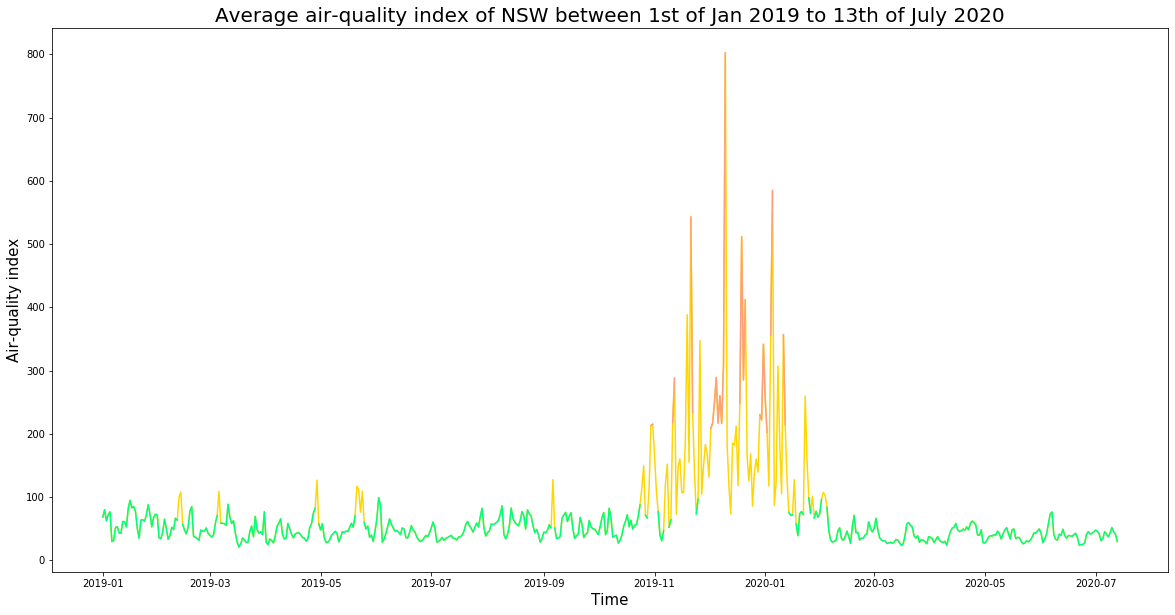

In [24]:
air_mask()

In [25]:
air_datecorrected_new = pd.merge(air_datecorrected, average_air, on='Date', how='left') #add the average data column to dataframe

def air_hist():
    N, bins, patches = plt.hist(air_datecorrected_new.iloc[:, 57], 30)

    divisions = [range(0,3),range(3,7),range(7,30)]
    colors = ['springgreen','gold','lightsalmon']
    labels = ['Healthy', 'Unhealthy','Dangerous']

    for d in divisions:
        patches[list(d)[0]].set_label(labels[divisions.index(d)])
        for i in d:
            patches[i].set_color(colors[divisions.index(d)])

    plt.title("Air Quality Index Histogram", fontsize=20)
    plt.xlabel("AQI", fontsize=15)
    plt.ylabel("Counts", fontsize=15)
    plt.grid(True)
    plt.legend()
    return (plt.show())

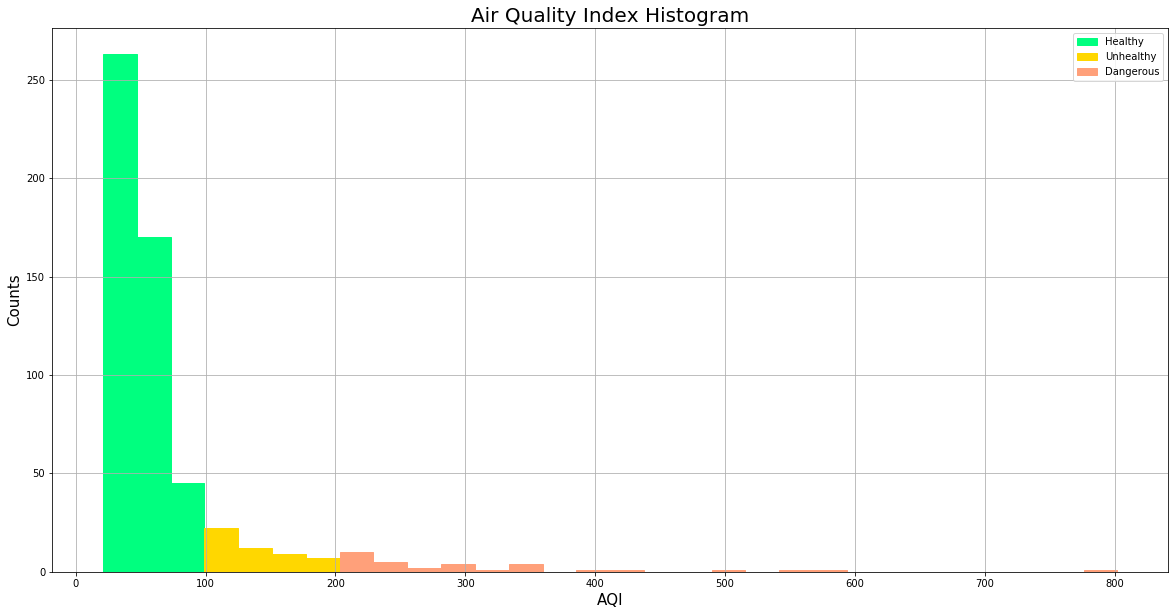

In [26]:
air_hist()

## The Analysis on the Relationship

In [27]:
air_map= pd.merge(left_join_df, air_transpose, on='nsw_loca_2', how='left')
air_map['Average_Before'] = pd.DataFrame(air_map.iloc[:,150:200].mean(axis=1))
air_map['Average_After'] = pd.DataFrame(air_map.iloc[:,520:570].mean(axis=1))
air_map.head(4)

,id_x,lc_ply_pid,loc_pid,nsw_loca_2,geometry,id_y,postcode,state,long,lat,...,2020-07-07 00:00:00,2020-07-08 00:00:00,2020-07-09 00:00:00,2020-07-10 00:00:00,2020-07-11 00:00:00,2020-07-12 00:00:00,2020-07-13 00:00:00,x_suburb,Average_Before,Average_After
0,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.1,25113,NSW1147,CROYDON PARK,"POLYGON ((151.11700 -33.89152, 151.11662 -33.8...",4261.0,2133.0,NSW,151.102087,-33.898793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.1,25113,NSW1147,CROYDON PARK,"POLYGON ((151.11700 -33.89152, 151.11662 -33.8...",13704.0,5008.0,SA,138.559407,-34.887511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.2,25065,NSW2557,MAYFIELD WEST,"POLYGON ((151.73345 -32.87974, 151.73282 -32.8...",3430.0,2304.0,NSW,151.738620,-32.880319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ckan_91e70237_d9d1_4719_a82f_e71b811154c6.3,25115,NSW797,CAMPSIE,"POLYGON ((151.11002 -33.90297, 151.11168 -33.9...",2885.0,2194.0,NSW,151.101777,-33.917601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def air_before_map():
    centroids = air_map.copy()
    centroids.geometry = air_map.centroid
    centroids['before_size'] = centroids['Average_Before']*5

    ax = air_map.plot(linewidth=0.2, facecolor='w', edgecolor='0.6')
    centroids.plot(markersize='before_size', c='thistle', ax=ax, linewidth=1,edgecolor='0.4')
    plt.title("Average Air Quality at Monitoring Station Before the Pandemic", fontsize=20)
    return (plt.show())

warnings.filterwarnings('ignore')

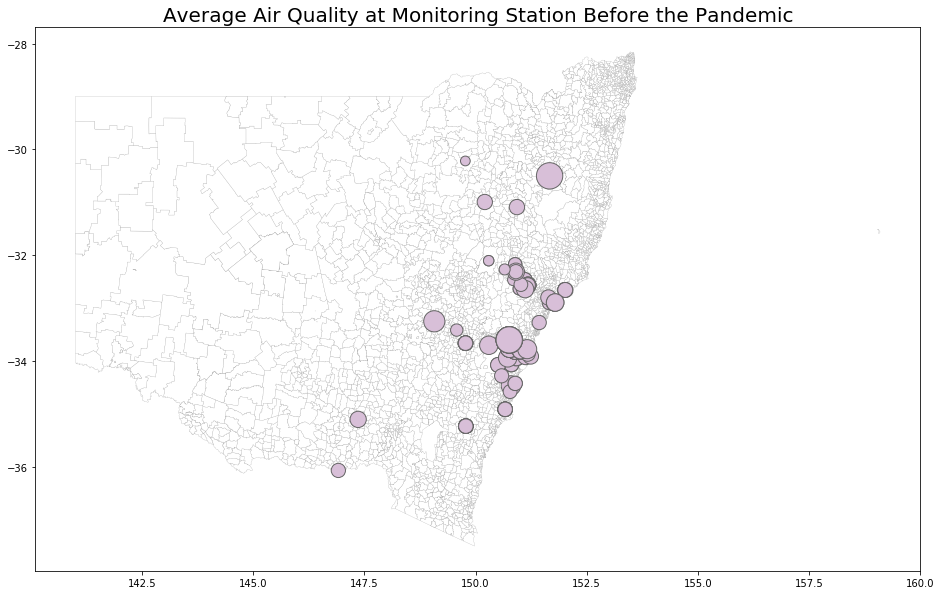

In [29]:
air_before_map()

In [30]:
def air_after_map():
    centroids = air_map.copy()
    centroids.geometry = air_map.centroid
    centroids['after_size'] = centroids['Average_After']*5

    ax = air_map.plot(linewidth=0.2, facecolor='w', edgecolor='0.6')
    centroids.plot(markersize='after_size', c='thistle', ax=ax,linewidth=1,edgecolor='0.4')
    plt.title("Average Air Quality at Monitoring Station During the Pandemic", fontsize=20)
    return (plt.show())

warnings.filterwarnings('ignore')

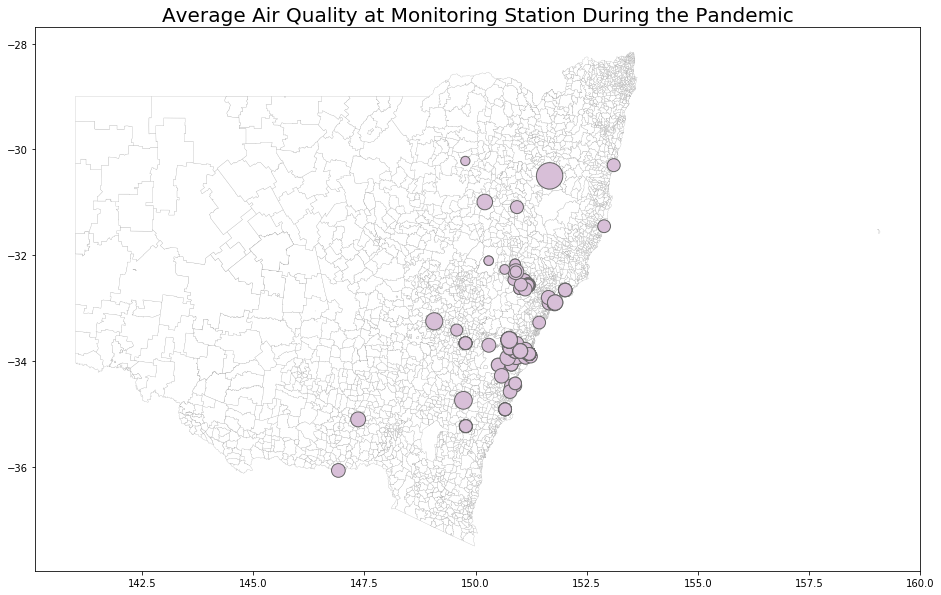

In [31]:
air_after_map()

In [32]:
covid_data['New Cases'] = covid_data.groupby(['Date']).size()

air_datecorrected=air_datecorrected.replace(0, np.nan)
air_datecorrected['Average AQI'] = air_datecorrected.mean(axis = 1)

In [33]:
air_covid = pd.merge(air_datecorrected, covid_data, on='Date', how='outer')
def rel_scatter():
    bad_idx = air_covid.index[air_covid['Average AQI'].pct_change().abs().ge(0.5)]
    air_covid.loc[(air_covid.index >= bad_idx.min()) & (air_covid.index < bad_idx.max()), 'Average AQI'] *= 0.5 #remove outliers
    sns.regplot(air_covid['New Cases'],air_covid['Average AQI'], scatter_kws={"color": "slategray"}, line_kws={"color": "darkblue"})

    plt.title("Scatter Plot of Number of Cases per day vs AQI of that day", fontsize=20)
    plt.xlabel('Number of Cases per day', fontsize=15)
    plt.ylabel('AQI of that day', fontsize=15)
    return (plt.show())
correlation = air_covid['Average AQI'].corr(air_covid['New Cases'])

Correlation is -0.1469467395067109 < 0


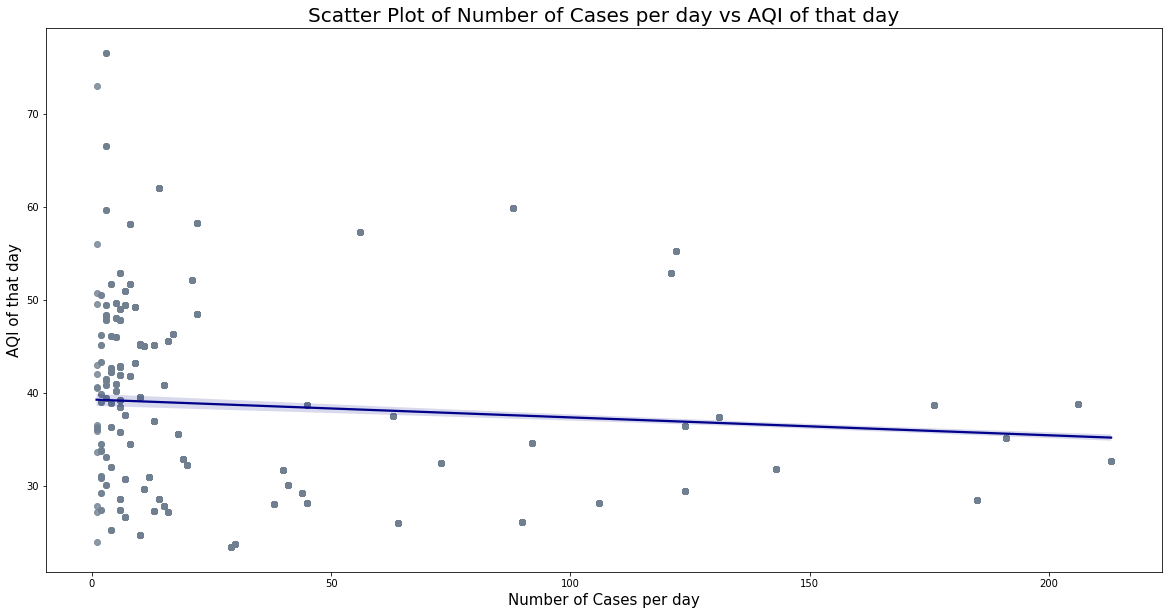

In [34]:
print('Correlation is', correlation, '< 0')
rel_scatter()

In [35]:
def rel_time():
    air_covid = pd.merge(air_datecorrected, covid_data, on='Date', how='outer')
    air_covid['New Cases']=air_covid['New Cases'].fillna(0)
    air_covid=air_covid.drop(air_covid.index[0:389], axis=0)
    ax = air_covid.plot(y='New Cases', c='r')
    air_covid.plot(y='Average AQI', ax=ax)
    plt.title("Number of Cases and AQI vs Time", fontsize=20)
    plt.xlabel('Time', fontsize=15)
    return (plt.show())

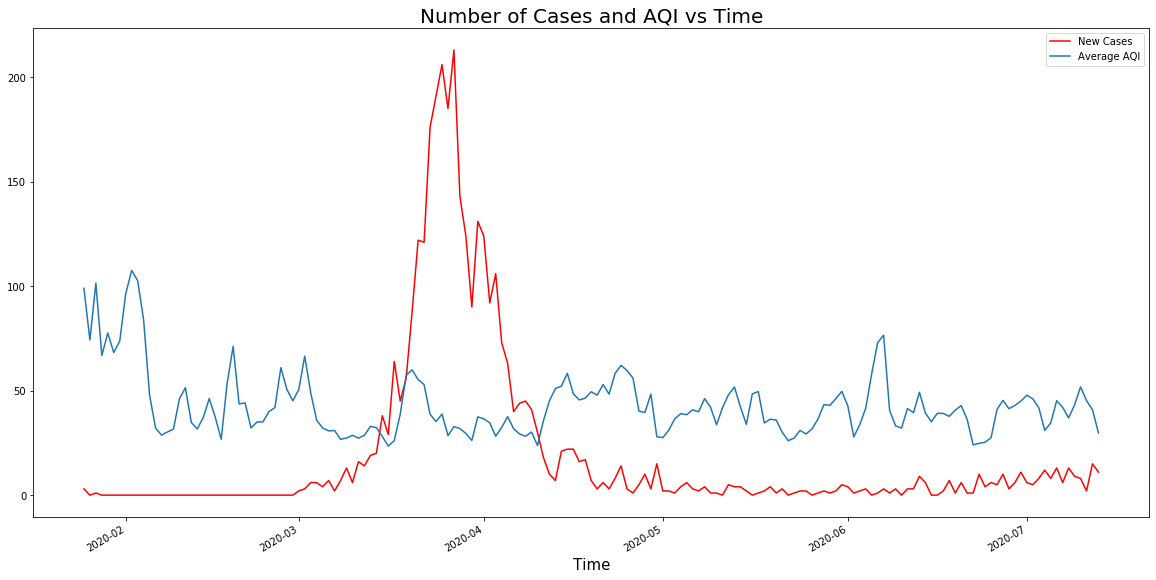

In [36]:
rel_time()

## Conclusion
As shown in the analysis, there is an inverse relationship between coronavirus cases and air quality with a very short time lag. This phenomena is likely resulted from the virus causing less human activities. The air quality data is however slightly biased due to the bushfires in 2019. Some graphs are adjusted to reduce the impact of the bushfire.

#### Short run:
- People react to the increase in covid-19 cases causing less air pollution. 

#### Long run:
- The government implies policies which restricts the movement of people and goods causing less air pollution. 
- Less consumer and investor confidence for the future, which causes production to reduce.
- Firms make decisions regarding remote working, decreasing travelling.